In [124]:
# Mòduls

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
# Dades

dades = pd.read_json('https://analisi.transparenciacatalunya.cat/resource/qww9-bvhh.json?$limit=20000')

In [126]:
# Preparació de dades

# Selecció de dades anuals 2007-2018
dades_anuals = dades.loc[dades['periode']=='gener-desembre',:]

# Dades gener-setembre de 2019
dades_2019 = dades.loc[dades['any']==2019,:] 
dades_cat = dades_anuals.append(dades_2019.loc[dades_2019['periode']=='gener-setembre',:])

# Eliminar valors nuls
dades_cat = dades_cat.loc[dades_cat['renda'].notna(),:]

# Dades a Sant Feliu de Llobregat
dades_sf = dades_cat.loc[dades_cat['codi_territorial']==8211,:]

# Preu constant 2020 a Sant Feliu
dades_sf = dades_sf.assign(ipc=[1.39, 1.42, 1.46, 1.47, 1.5, 1.54, 1.58, 1.59, 1.59, 1.59, 1.61, 1.63, 1.65])
dades_sf['renda2020'] = 1.68 * dades_sf['renda'] / dades_sf['ipc']

# Mitjana de preus de Catalunya
dades_cat['pes'] = dades_cat['habitatges'] * dades_cat['renda']
mitjana_cat = dades_cat.loc[:,['any', 'pes','habitatges']].groupby(['any'], as_index=False).sum()
mitjana_cat['renda'] = mitjana_cat['pes'] / mitjana_cat['habitatges']

([<matplotlib.axis.XTick at 0x12c8121d0>,
 <a list of 13 Text xticklabel objects>)

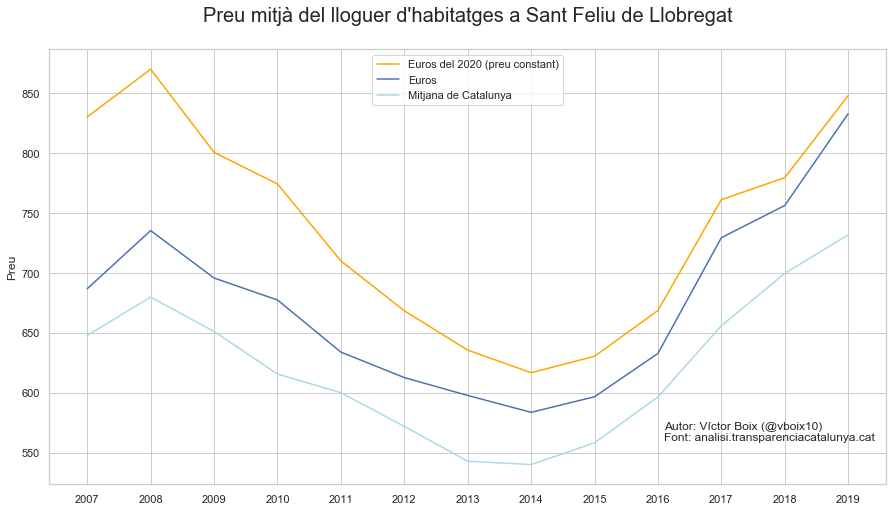

In [127]:
# Visualització preus

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 8))

sns.lineplot(data=dades_sf, x='any', y='renda2020', label="Euros del 2020 (preu constant)", color='orange')
sns.lineplot(data=dades_sf, x='any', y='renda', label="Euros", color='b')
sns.lineplot(data=mitjana_cat, x='any', y='renda', label="Mitjana de Catalunya", color='lightblue')

ax.set(xlabel='', ylabel="Preu")
ax.set_title("Preu mitjà del lloguer d'habitatges a Sant Feliu de Llobregat\n", fontsize=20)
plt.text(x=2016.1, y=560, s="Autor: Víctor Boix (@vboix10)\nFont: analisi.transparenciacatalunya.cat")
ax.legend(ncol=1, loc="upper center", frameon=True)
plt.xticks(range(2007,2020))

Text(0, 640, 'Autor: Víctor Boix (@vboix10)\nFont: analisi.transparenciacatalunya.cat')

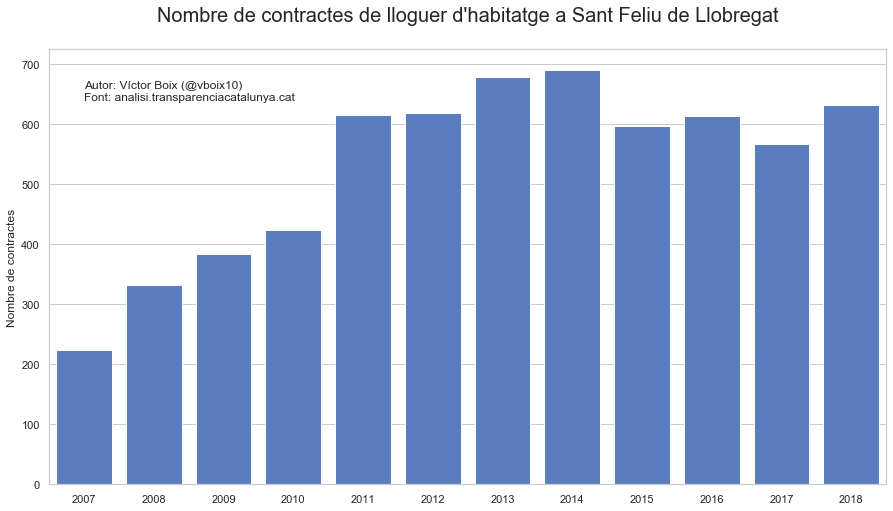

In [129]:
# Visualització nombre de contractes

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 8))

sns.set_color_codes("muted")
sns.barplot(data=dades_sf[:-1], x='any', y='habitatges', color='b')
ax.set(xlabel='', ylabel="Nombre de contractes")
ax.set_title("Nombre de contractes de lloguer d'habitatge a Sant Feliu de Llobregat\n", fontsize=20)
plt.text(x=0, y=640, s="Autor: Víctor Boix (@vboix10)\nFont: analisi.transparenciacatalunya.cat")